# Further Analysis of Neurotransmitter Genes and Patient Survival

Now we can focus on determining the effect that gene expression from our various neurotransmitter genes of interest have on patient survival rates. 

We can start by importing our necessary data tables

## Part 0: Data Preparation

In [1]:
# importing data analysis libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fixes the setting with copy warning
pd.options.mode.chained_assignment = None

In [3]:
def filter_survival_table(file_path):
    full_table = pd.read_csv('datasets/TCGA_PAAD_survival_data.csv', delimiter=',')
    survival_filtered = full_table[full_table.columns.intersection(['submitter_id', 'Disease Free Status',
                                              'Overall Survival (Months)', 'Overall Survival Status'])]
    
    return survival_filtered


#### Commentary

Here we are reading the csv file and importing it as a dataframe named survival. When we display the output for survival, we get ~154 patients and their data. The important ones for now are "submitter_id", "Filename", "Overall Survival (Months)", "Overall Survival Status".

I have gone ahead and filtered the most important columns into a table called survival filtered, shown below. The survival table is filtered with the filter_survival_table function.

In [4]:
survival = pd.read_csv('datasets/TCGA_PAAD_survival_data.csv', delimiter=',')

In [5]:
survival

,Cancer_type,submitter_id,PNI,LVI,Filename,Diagnosis Age,Sex,Race Category,Disease Free (Months),Disease Free Status,Overall Survival (Months),Overall Survival Status
0,PAAD,TCGA-HZ-7923,0,0,42bec5f7-7623-42e6-bbdf-514fe3805940.htseq.cou...,65,Male,WHITE,10.32,DiseaseFree,10.32,LIVING
1,PAAD,TCGA-US-A776,0,0,19a3b9bb-d4cb-4925-a87a-57f724141a67.htseq.cou...,61,Male,WHITE,39.95,DiseaseFree,39.95,LIVING
2,PAAD,TCGA-HZ-A77Q,0,0,03630a0c-aa97-4e28-bac9-0206fff669cd.htseq.cou...,55,Female,WHITE,1.08,DiseaseFree,1.08,LIVING
3,PAAD,TCGA-2J-AABA,0,0,c4cadcbb-ae87-43a5-811c-6bedda1d1d8d.htseq.cou...,55,Male,WHITE,15.51,Recurred/Progressed,19.94,DECEASED
4,PAAD,TCGA-F2-6879,0,0,16c63027-f745-41c4-a5e8-f6d9f1fbf1c8.htseq.cou...,57,Male,WHITE,6.01,Recurred/Progressed,10.97,DECEASED
...,...,...,...,...,...,...,...,...,...,...,...,...
149,PAAD,TCGA-2J-AABO,1,-,c642e018-f0cb-4be8-9b19-c944f1daf9cf.htseq.cou...,43,Male,WHITE,14.45,Recurred/Progressed,14.45,LIVING
150,PAAD,TCGA-H6-A45N,1,-,1f997074-0020-47e6-9928-5bf7209c552d.htseq.cou...,88,Female,WHITE,11.93,Recurred/Progressed,13.83,DECEASED
151,PAAD,TCGA-2L-AAQI,1,-,d5612378-33e0-4fe5-ad2f-a1887fb7b5cd.htseq.cou...,66,Male,WHITE,NaN,NaN,3.38,DECEASED
152,PAAD,TCGA-2L-AAQJ,1,-,d7d3fe8e-3885-44e8-934c-50f2a3bbfb2f.htseq.cou...,49,Female,WHITE,NaN,NaN,12.94,DECEASED


In [6]:
survival_filtered = filter_survival_table('datasets/TCGA_PAAD_survival_data.csv')

survival_filtered

,submitter_id,Disease Free Status,Overall Survival (Months),Overall Survival Status
0,TCGA-HZ-7923,DiseaseFree,10.32,LIVING
1,TCGA-US-A776,DiseaseFree,39.95,LIVING
2,TCGA-HZ-A77Q,DiseaseFree,1.08,LIVING
3,TCGA-2J-AABA,Recurred/Progressed,19.94,DECEASED
4,TCGA-F2-6879,Recurred/Progressed,10.97,DECEASED
...,...,...,...,...
149,TCGA-2J-AABO,Recurred/Progressed,14.45,LIVING
150,TCGA-H6-A45N,Recurred/Progressed,13.83,DECEASED
151,TCGA-2L-AAQI,NaN,3.38,DECEASED
152,TCGA-2L-AAQJ,NaN,12.94,DECEASED


Attempt 1 to filter rnaseq table

#### Commentary

Below I am importing the rnaseq file we have worked with in the past. Given that we want this file in TPM, the cancer_expression_heatmap file will generate a csv output of all of the rnaseq genes and their respective TPM values. This is the file I am importing below.

We are also changing the names of the

In [7]:
all_rnaseq = pd.read_csv('datasets/tpm_rnaseq_values.csv', delimiter = ',')
all_rnaseq.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
all_rnaseq

,hgnc_symbol,X00faf8ba.ff90.4214.9d03.6c5e14645d8f.htseq.counts.gz,X0143419f.2abe.4906.bb55.af6010fab05f.htseq.counts.gz,X01f84c45.2058.4e22.b234.52f0a82a97fc.htseq.counts.gz,X03094067.02d4.40c5.b6fa.bb5180dc7eab.htseq.counts.gz,X0349f526.7816.4a7d.9967.1f75dd9ff00a.htseq.counts.gz,X03630a0c.aa97.4e28.bac9.0206fff669cd.htseq.counts.gz,X03761959.a620.440f.bbaa.33bd75afae1c.htseq.counts.gz,X057aa9ac.f22c.4c11.a44d.ad52ae59b4cf.htseq.counts.gz,X05f0ced5.6976.4f43.9be5.fddb3f550adf.htseq.counts.gz,...,eb3894d4.fcae.43ef.ad68.b756c6aa56ea.htseq.counts.gz,f144de50.6126.4912.9c94.824d1eb0fac5.htseq.counts.gz,f2389819.b8fc.460e.821c.01dba313cce1.htseq.counts.gz,f6bd7191.a820.4d86.927a.b4b5f88ebd67.htseq.counts.gz,f748bf78.4dc1.47ad.8611.8186479d3e4b.htseq.counts.gz,f8551a29.d4bd.4954.bf9c.8e10265063de.htseq.counts.gz,f9f63982.b0ee.4cb8.8de5.f885d82137f0.htseq.counts.gz,fcd43085.7338.43fe.bc25.9d87b04e227f.htseq.counts.gz,feb22766.4282.47c8.bfe2.7d020b4a15d4.htseq.counts.gz,fef65b57.c58d.4050.8de4.f09f5cd616ce.htseq.counts.gz
0,A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A1BG-AS1,0.000000,0.003194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A1CF,2.309769,1.000181,0.938172,2.926842,1.543916,2.050687,3.472595,2.029432,1.803029,...,1.840984,1.085729,1.219825,2.605873,1.391728,0.914085,2.117189,1.703033,1.026183,1.366619
3,A2M,0.021386,0.042228,0.049990,0.086746,0.040230,0.034071,0.082039,0.100178,0.075406,...,0.137374,0.033416,0.055014,0.052197,0.028828,0.052467,0.142909,0.053788,0.007786,0.087196
4,A2M-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37333,ZYG11AP1,1.086166,0.223943,0.951985,0.754221,0.877830,0.049010,0.058149,0.785407,2.491832,...,0.682356,0.233470,0.230623,0.510561,0.920743,0.957988,6.032869,1.802480,0.179193,0.938191
37334,ZYG11B,0.712352,0.699739,1.146391,1.630466,1.630979,1.139453,0.901481,1.561259,1.222441,...,1.469878,0.791683,1.113077,1.503630,0.856166,1.399279,1.226022,0.688100,0.798788,1.181202
37335,ZYX,6.279327,2.844382,3.221809,8.717051,1.711744,24.259133,79.036783,7.033466,11.509842,...,8.134696,9.797582,2.881271,11.321482,5.061776,11.965091,10.241018,6.305561,3.145112,4.736807
37336,ZYXP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.290379,0.000000,0.000000,0.000000,0.000000


In [9]:
def remove_x_from_columns(rnaseq_table):
    column_list = rnaseq_table.columns.values
    count_files_list = []
    # removing the x from some of the file names
    for file in column_list:
        if (file[0] == 'X'):
            remove_x = file.replace('X', '')
            count_files_list.append(remove_x)
        else:
            count_files_list.append(file)
            
    rnaseq_table.columns = count_files_list
    return rnaseq_table

In [10]:
all_rnaseq = remove_x_from_columns(all_rnaseq)

In [11]:
all_rnaseq

,hgnc_symbol,00faf8ba.ff90.4214.9d03.6c5e14645d8f.htseq.counts.gz,0143419f.2abe.4906.bb55.af6010fab05f.htseq.counts.gz,01f84c45.2058.4e22.b234.52f0a82a97fc.htseq.counts.gz,03094067.02d4.40c5.b6fa.bb5180dc7eab.htseq.counts.gz,0349f526.7816.4a7d.9967.1f75dd9ff00a.htseq.counts.gz,03630a0c.aa97.4e28.bac9.0206fff669cd.htseq.counts.gz,03761959.a620.440f.bbaa.33bd75afae1c.htseq.counts.gz,057aa9ac.f22c.4c11.a44d.ad52ae59b4cf.htseq.counts.gz,05f0ced5.6976.4f43.9be5.fddb3f550adf.htseq.counts.gz,...,eb3894d4.fcae.43ef.ad68.b756c6aa56ea.htseq.counts.gz,f144de50.6126.4912.9c94.824d1eb0fac5.htseq.counts.gz,f2389819.b8fc.460e.821c.01dba313cce1.htseq.counts.gz,f6bd7191.a820.4d86.927a.b4b5f88ebd67.htseq.counts.gz,f748bf78.4dc1.47ad.8611.8186479d3e4b.htseq.counts.gz,f8551a29.d4bd.4954.bf9c.8e10265063de.htseq.counts.gz,f9f63982.b0ee.4cb8.8de5.f885d82137f0.htseq.counts.gz,fcd43085.7338.43fe.bc25.9d87b04e227f.htseq.counts.gz,feb22766.4282.47c8.bfe2.7d020b4a15d4.htseq.counts.gz,fef65b57.c58d.4050.8de4.f09f5cd616ce.htseq.counts.gz
0,A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A1BG-AS1,0.000000,0.003194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A1CF,2.309769,1.000181,0.938172,2.926842,1.543916,2.050687,3.472595,2.029432,1.803029,...,1.840984,1.085729,1.219825,2.605873,1.391728,0.914085,2.117189,1.703033,1.026183,1.366619
3,A2M,0.021386,0.042228,0.049990,0.086746,0.040230,0.034071,0.082039,0.100178,0.075406,...,0.137374,0.033416,0.055014,0.052197,0.028828,0.052467,0.142909,0.053788,0.007786,0.087196
4,A2M-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37333,ZYG11AP1,1.086166,0.223943,0.951985,0.754221,0.877830,0.049010,0.058149,0.785407,2.491832,...,0.682356,0.233470,0.230623,0.510561,0.920743,0.957988,6.032869,1.802480,0.179193,0.938191
37334,ZYG11B,0.712352,0.699739,1.146391,1.630466,1.630979,1.139453,0.901481,1.561259,1.222441,...,1.469878,0.791683,1.113077,1.503630,0.856166,1.399279,1.226022,0.688100,0.798788,1.181202
37335,ZYX,6.279327,2.844382,3.221809,8.717051,1.711744,24.259133,79.036783,7.033466,11.509842,...,8.134696,9.797582,2.881271,11.321482,5.061776,11.965091,10.241018,6.305561,3.145112,4.736807
37336,ZYXP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.290379,0.000000,0.000000,0.000000,0.000000


#### Commentary

Looking at the "Filenames" column of the survival table, we can see that dashes "-" are used to segment the file name, but periods "." are used to segment file names in the rnaseq table columns. This inconsistency will lead to none of the columns matching, so we can use the create_counts_list function to obtain all of these filenames, convert any "-" to "." and then generate a new list of Filenames with proper format.

In [12]:
def create_counts_list(patient_table):
    
    count_files = patient_table['Filename'].tolist()
    
    count_files_list = []
    # the filenames column is formatted differently from the column names in the RNASeq table
    for file in count_files:
        remove_dash = file.replace('-', '.')
        #remove_tab = remove_dash.replace('\t', '')
        count_files_list.append(remove_dash)
    
    return count_files_list

#### Commentary

The filter_patients function below takes the rnaseq table and filters for column names that match our file names list we created above in create_counts_list. The result of this function filtered out about ~100 cases from our original table. We can jump over to test_tumor_survival_associations to test this function.

In [13]:
def filter_patients(rnaseq_table):
    count_files = create_counts_list(survival)
    rnaseq_survival = rnaseq_table[rnaseq_table.columns.intersection(count_files)]
    first_column = rnaseq_table['hgnc_symbol']
    rnaseq_survival.insert(0, 'hgnc_symbol', first_column)
    
    return rnaseq_survival

In [14]:
rnaseq_survival = filter_patients(all_rnaseq)

In [15]:
rnaseq_survival

,hgnc_symbol,00faf8ba.ff90.4214.9d03.6c5e14645d8f.htseq.counts.gz,0143419f.2abe.4906.bb55.af6010fab05f.htseq.counts.gz,01f84c45.2058.4e22.b234.52f0a82a97fc.htseq.counts.gz,03094067.02d4.40c5.b6fa.bb5180dc7eab.htseq.counts.gz,0349f526.7816.4a7d.9967.1f75dd9ff00a.htseq.counts.gz,03630a0c.aa97.4e28.bac9.0206fff669cd.htseq.counts.gz,03761959.a620.440f.bbaa.33bd75afae1c.htseq.counts.gz,057aa9ac.f22c.4c11.a44d.ad52ae59b4cf.htseq.counts.gz,05f0ced5.6976.4f43.9be5.fddb3f550adf.htseq.counts.gz,...,eb3894d4.fcae.43ef.ad68.b756c6aa56ea.htseq.counts.gz,f144de50.6126.4912.9c94.824d1eb0fac5.htseq.counts.gz,f2389819.b8fc.460e.821c.01dba313cce1.htseq.counts.gz,f6bd7191.a820.4d86.927a.b4b5f88ebd67.htseq.counts.gz,f748bf78.4dc1.47ad.8611.8186479d3e4b.htseq.counts.gz,f8551a29.d4bd.4954.bf9c.8e10265063de.htseq.counts.gz,f9f63982.b0ee.4cb8.8de5.f885d82137f0.htseq.counts.gz,fcd43085.7338.43fe.bc25.9d87b04e227f.htseq.counts.gz,feb22766.4282.47c8.bfe2.7d020b4a15d4.htseq.counts.gz,fef65b57.c58d.4050.8de4.f09f5cd616ce.htseq.counts.gz
0,A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A1BG-AS1,0.000000,0.003194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A1CF,2.309769,1.000181,0.938172,2.926842,1.543916,2.050687,3.472595,2.029432,1.803029,...,1.840984,1.085729,1.219825,2.605873,1.391728,0.914085,2.117189,1.703033,1.026183,1.366619
3,A2M,0.021386,0.042228,0.049990,0.086746,0.040230,0.034071,0.082039,0.100178,0.075406,...,0.137374,0.033416,0.055014,0.052197,0.028828,0.052467,0.142909,0.053788,0.007786,0.087196
4,A2M-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37333,ZYG11AP1,1.086166,0.223943,0.951985,0.754221,0.877830,0.049010,0.058149,0.785407,2.491832,...,0.682356,0.233470,0.230623,0.510561,0.920743,0.957988,6.032869,1.802480,0.179193,0.938191
37334,ZYG11B,0.712352,0.699739,1.146391,1.630466,1.630979,1.139453,0.901481,1.561259,1.222441,...,1.469878,0.791683,1.113077,1.503630,0.856166,1.399279,1.226022,0.688100,0.798788,1.181202
37335,ZYX,6.279327,2.844382,3.221809,8.717051,1.711744,24.259133,79.036783,7.033466,11.509842,...,8.134696,9.797582,2.881271,11.321482,5.061776,11.965091,10.241018,6.305561,3.145112,4.736807
37336,ZYXP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.290379,0.000000,0.000000,0.000000,0.000000


tests came up a little weird, the count files are not exact matches (this has been fixed 4/19)

### Let's try to use the submitter_id to filter instead, using the PAAD patients file for filenames/count_files

#### Commentary

We came up with 147 columns in the above method. We can try to filter via a different method of filtering using the PAAD patients data table instead. The outcome of this is that it filtered in one additional column, shown in the output of the difference_between_two_lists function

In [16]:
def filter_by_submitter_id(rnaseq_table, patient_table):
    # submitter ids look like this TCGA-HZ-7923
    submitter_id_list = patient_table['submitter_id'].tolist()
    all_paad_patients = pd.read_csv('datasets/Sophia_PAAD_patients.csv', delimiter = ',')
    paad_patients = all_paad_patients[all_paad_patients['submitter_id'].isin(submitter_id_list)]
    # nothing was filtered, all submitter ids present in both tables
    counts = create_counts_list(paad_patients)
    
    first_column = rnaseq_table['hgnc_symbol']
    rnaseq_survival = rnaseq_table[rnaseq_table.columns.intersection(counts)]
    rnaseq_survival.insert(0, 'hgnc_symbol', first_column)
    return rnaseq_survival

rnaseq_survival_byid = filter_by_submitter_id(all_rnaseq, survival)

In [17]:
rnaseq_survival_byid

,hgnc_symbol,00faf8ba.ff90.4214.9d03.6c5e14645d8f.htseq.counts.gz,0143419f.2abe.4906.bb55.af6010fab05f.htseq.counts.gz,01f84c45.2058.4e22.b234.52f0a82a97fc.htseq.counts.gz,03094067.02d4.40c5.b6fa.bb5180dc7eab.htseq.counts.gz,0349f526.7816.4a7d.9967.1f75dd9ff00a.htseq.counts.gz,03630a0c.aa97.4e28.bac9.0206fff669cd.htseq.counts.gz,03761959.a620.440f.bbaa.33bd75afae1c.htseq.counts.gz,057aa9ac.f22c.4c11.a44d.ad52ae59b4cf.htseq.counts.gz,05f0ced5.6976.4f43.9be5.fddb3f550adf.htseq.counts.gz,...,eb3894d4.fcae.43ef.ad68.b756c6aa56ea.htseq.counts.gz,f144de50.6126.4912.9c94.824d1eb0fac5.htseq.counts.gz,f2389819.b8fc.460e.821c.01dba313cce1.htseq.counts.gz,f6bd7191.a820.4d86.927a.b4b5f88ebd67.htseq.counts.gz,f748bf78.4dc1.47ad.8611.8186479d3e4b.htseq.counts.gz,f8551a29.d4bd.4954.bf9c.8e10265063de.htseq.counts.gz,f9f63982.b0ee.4cb8.8de5.f885d82137f0.htseq.counts.gz,fcd43085.7338.43fe.bc25.9d87b04e227f.htseq.counts.gz,feb22766.4282.47c8.bfe2.7d020b4a15d4.htseq.counts.gz,fef65b57.c58d.4050.8de4.f09f5cd616ce.htseq.counts.gz
0,A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A1BG-AS1,0.000000,0.003194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A1CF,2.309769,1.000181,0.938172,2.926842,1.543916,2.050687,3.472595,2.029432,1.803029,...,1.840984,1.085729,1.219825,2.605873,1.391728,0.914085,2.117189,1.703033,1.026183,1.366619
3,A2M,0.021386,0.042228,0.049990,0.086746,0.040230,0.034071,0.082039,0.100178,0.075406,...,0.137374,0.033416,0.055014,0.052197,0.028828,0.052467,0.142909,0.053788,0.007786,0.087196
4,A2M-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37333,ZYG11AP1,1.086166,0.223943,0.951985,0.754221,0.877830,0.049010,0.058149,0.785407,2.491832,...,0.682356,0.233470,0.230623,0.510561,0.920743,0.957988,6.032869,1.802480,0.179193,0.938191
37334,ZYG11B,0.712352,0.699739,1.146391,1.630466,1.630979,1.139453,0.901481,1.561259,1.222441,...,1.469878,0.791683,1.113077,1.503630,0.856166,1.399279,1.226022,0.688100,0.798788,1.181202
37335,ZYX,6.279327,2.844382,3.221809,8.717051,1.711744,24.259133,79.036783,7.033466,11.509842,...,8.134696,9.797582,2.881271,11.321482,5.061776,11.965091,10.241018,6.305561,3.145112,4.736807
37336,ZYXP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.290379,0.000000,0.000000,0.000000,0.000000


so basically in the above portions, the first route we took was to pull Filenames directly out of the survival table, and then apply those Filenames onto the columns of our rnaseq table.

the second route was to pull submitter_id out of the survival table, lookup the Filenames from the submitter_id in the paad_patients file, and then filter the columns of the rnaseq table.

In [18]:
def difference_between_two_lists(list1, list2):
    forward = set(list1)
    reverse = set(list2)
    return list( forward.symmetric_difference(reverse) )

difference_between_two_lists(rnaseq_survival_byid.columns.values, rnaseq_survival.columns.values)

['cd1bba0f.b2e8.45e3.9b37.dcec5472cb7b.htseq.counts.gz']

# Part 1: Sorting and Filtering RNASeq Data

we can filter through our rnaseq data for patients of interest

In [19]:
def patient_percentile_by_gene(table, gene):
    
    copy = table.copy()
    gene_index = copy.index[copy['hgnc_symbol'] == gene].tolist()
    percentile = int(len(copy.columns.values) * 0.25)
    
    to_sort = copy.loc[copy['hgnc_symbol'] == gene]
    
    # for removing the hgnc column and adding back in later
    hgnc = to_sort.loc[:, 'hgnc_symbol']
    to_sort.drop('hgnc_symbol', axis=1, inplace=True)

    #return to_sort
    to_sort.sort_values(by=gene_index[0], ascending=False, axis=1, inplace=True)
    to_sort.insert(0, 'hgnc_symbol', hgnc)
    
    upper_quartile = to_sort.iloc[:, :percentile+1]
    lower_quartile = to_sort.iloc[:, len(copy.columns.values)-percentile:]
    lower_quartile.insert(0, 'hgnc_symbol', hgnc)
    
    return upper_quartile, lower_quartile

upper_quartile_adrb2, lower_quartile_adrb2 = patient_percentile_by_gene(all_rnaseq, 'ADRB2')

In [20]:
upper_quartile_adrb2

,hgnc_symbol,6c73911d.8d0a.4a5a.9251.4ded7ea70fef.htseq.counts.gz,98b1beb5.8d4c.45d1.a618.2d43aafa056c.htseq.counts.gz,25b906db.fd54.4b85.b67e.e421826bd794.htseq.counts.gz,08562fbc.4f41.408b.8bd1.0c656071d69f.htseq.counts.gz,d42d7f7b.1ba5.4ba5.8af2.35755fef2d69.htseq.counts.gz,cde0617f.fcd6.4c58.b3cf.dcfabc6fcda7.htseq.counts.gz,eb3894d4.fcae.43ef.ad68.b756c6aa56ea.htseq.counts.gz,136067dc.fde9.42e4.8488.d38c7e2d713c.htseq.counts.gz,b9ab7393.4abb.41ec.9d55.a3dc846c4a93.htseq.counts.gz,...,44c3d518.14fa.4d63.b265.d7fc81c398e2.htseq.counts.gz,844163ae.2444.4406.9873.12e8295e3e07.htseq.counts.gz,b0159d01.f1eb.490d.875b.cfdabed6f529.htseq.counts.gz,65a45bca.b5d4.4763.a51f.f7b9ad9efcb9.htseq.counts.gz,e8924790.8df6.40ed.be0d.2c74d8c2d974.htseq.counts.gz,cc133a8a.77ad.4570.852e.df72548c6897.htseq.counts.gz,87c17703.72c7.4207.8935.3391f207f4a6.htseq.counts.gz,feb22766.4282.47c8.bfe2.7d020b4a15d4.htseq.counts.gz,798e9f56.9964.4544.9d06.6a3aea20d0a6.htseq.counts.gz,c98f395b.003f.41b1.abff.38b6b227d64c.htseq.counts.gz
524,ADRB2,37.306216,27.620327,27.029471,24.999545,24.161432,23.958184,23.8802,23.605659,23.529877,...,19.801661,19.343447,19.047139,18.204514,18.029534,17.817788,17.759197,17.712482,17.023861,16.977867


In [21]:
lower_quartile_adrb2

,hgnc_symbol,f6bd7191.a820.4d86.927a.b4b5f88ebd67.htseq.counts.gz,caf9cab4.f98f.46bd.a75d.0eb1e9c6c9ea.htseq.counts.gz,59f31be1.8904.4395.a968.8bc9f68b5160.htseq.counts.gz,7186ee30.db1a.43ad.955b.886cd5b5e771.htseq.counts.gz,a2a33be8.232b.44bf.a003.349017a5bc5a.htseq.counts.gz,e770b299.b4c2.4dee.95a8.abc3c5773439.htseq.counts.gz,49895f4a.72ac.4d5e.ba56.8c8bb5de4758.htseq.counts.gz,01f84c45.2058.4e22.b234.52f0a82a97fc.htseq.counts.gz,fef65b57.c58d.4050.8de4.f09f5cd616ce.htseq.counts.gz,...,7989aed0.f0bc.4f0c.a8ae.f084221ed3f5.htseq.counts.gz,30ce3471.112b.426c.ab57.6c0ab8e85dd2.htseq.counts.gz,20f5f419.da3f.4c43.95fb.f7b6218c49f6.htseq.counts.gz,fcd43085.7338.43fe.bc25.9d87b04e227f.htseq.counts.gz,c642e018.f0cb.4be8.9b19.c944f1daf9cf.htseq.counts.gz,b490fdcb.d7ae.4473.93a5.eb332225b81b.htseq.counts.gz,6423474d.60d7.4401.8e5b.46a3fbde5299.htseq.counts.gz,232f085b.6201.4e4d.8473.e592b8d8e16d.htseq.counts.gz,0be94b2f.fccb.4482.b0ea.695c101aa65a.htseq.counts.gz,a995d6ba.19c7.498f.b2d8.3f9b4b4826a1.htseq.counts.gz
524,ADRB2,10.001293,9.893382,9.676688,9.545395,9.118879,9.055446,8.960247,8.932134,8.808867,...,6.109053,6.036924,6.016945,5.460069,5.429504,5.250072,4.694696,4.490218,3.946579,3.787755


#### Commentary

since filter by submitter id had the greater amount of patients filtered in, we're using that function for our later filtering.

we're also looking to join our survival table data with the selected rnaseq data (the upper and lower quartile tables created above). so we'll do that in our function below

in this table, 

In [22]:
upper_quartile_adrb2 = filter_by_submitter_id(upper_quartile_adrb2, survival)

In [23]:
lower_quartile_adrb2 = filter_by_submitter_id(lower_quartile_adrb2, survival)

In [24]:
def change_count_fmt_in_columns(survival_table):
    count_files_list = create_counts_list(survival_table)
    survival_table.index = count_files_list
    return survival_table

In [25]:
def map_survival_to_patients(rnaseq_table, survival_table):
    # preparing our survival table
    survival_select = survival_table[survival_table.columns.intersection(['Filename',
                                                                 'Overall Survival (Months)', 
                                                                 'Overall Survival Status'])]
    survival_select = change_count_fmt_in_columns(survival_select)
    survival_select.drop('Filename', axis=1, inplace=True)
    
    # preparing our rnaseq table
    rna = rnaseq_table.copy()
    hgnc = rna['hgnc_symbol']
    rna.drop('hgnc_symbol', axis=1, inplace=True)
    rna_selected = rna.transpose()
    
    # in this function we're going to join the dataframes by the filename columns
    # we've manipulated our rnaseq table and survival table so that the index is our filenames
    # so we can go ahead and merge these by index
    rna_filenames = rna_selected.index.values.tolist()
    
    # because the two tables are different sizes, it'll be easier if we just filter the table
    # so we can join them
    survival_select_filter = survival_select[survival_select.index.isin(rna_filenames)]
    
    merged = rna_selected.merge(survival_select, left_index=True, right_index=True)

    # changing the column name from the original index to the gene name
    merged = merged.rename(columns={merged.columns.values[0] : hgnc.iloc[0]})
    return merged

upper_quartile_adrb2_survival = map_survival_to_patients(upper_quartile_adrb2, survival)

In [26]:
lower_quartile_adrb2_survival = map_survival_to_patients(lower_quartile_adrb2, survival)

In [27]:
upper_quartile_adrb2_survival

,ADRB2,Overall Survival (Months),Overall Survival Status
6c73911d.8d0a.4a5a.9251.4ded7ea70fef.htseq.counts.gz,37.306216,7.36,DECEASED
98b1beb5.8d4c.45d1.a618.2d43aafa056c.htseq.counts.gz,27.620327,8.02,DECEASED
25b906db.fd54.4b85.b67e.e421826bd794.htseq.counts.gz,27.029471,3.94,DECEASED
08562fbc.4f41.408b.8bd1.0c656071d69f.htseq.counts.gz,24.999545,15.11,DECEASED
d42d7f7b.1ba5.4ba5.8af2.35755fef2d69.htseq.counts.gz,24.161432,20.17,DECEASED
cde0617f.fcd6.4c58.b3cf.dcfabc6fcda7.htseq.counts.gz,23.958184,4.04,DECEASED
eb3894d4.fcae.43ef.ad68.b756c6aa56ea.htseq.counts.gz,23.880200,10.12,DECEASED
136067dc.fde9.42e4.8488.d38c7e2d713c.htseq.counts.gz,23.605659,7.65,DECEASED
b9ab7393.4abb.41ec.9d55.a3dc846c4a93.htseq.counts.gz,23.529877,17.02,DECEASED
4df16e07.cdbc.46cc.8b9c.39d4a9dca09e.htseq.counts.gz,22.784255,66.23,LIVING


In [28]:
lower_quartile_adrb2_survival

,ADRB2,Overall Survival (Months),Overall Survival Status
f6bd7191.a820.4d86.927a.b4b5f88ebd67.htseq.counts.gz,10.001293,11.50,LIVING
caf9cab4.f98f.46bd.a75d.0eb1e9c6c9ea.htseq.counts.gz,9.893382,2.17,DECEASED
59f31be1.8904.4395.a968.8bc9f68b5160.htseq.counts.gz,9.676688,66.89,DECEASED
7186ee30.db1a.43ad.955b.886cd5b5e771.htseq.counts.gz,9.545395,12.52,DECEASED
a2a33be8.232b.44bf.a003.349017a5bc5a.htseq.counts.gz,9.118879,15.31,DECEASED
e770b299.b4c2.4dee.95a8.abc3c5773439.htseq.counts.gz,9.055446,7.19,DECEASED
49895f4a.72ac.4d5e.ba56.8c8bb5de4758.htseq.counts.gz,8.960247,7.39,LIVING
01f84c45.2058.4e22.b234.52f0a82a97fc.htseq.counts.gz,8.932134,42.28,LIVING
fef65b57.c58d.4050.8de4.f09f5cd616ce.htseq.counts.gz,8.808867,6.01,DECEASED
00faf8ba.ff90.4214.9d03.6c5e14645d8f.htseq.counts.gz,8.646238,49.34,DECEASED


# Part 2: Kaplan-Meier Curves


We will use Kaplan-Meier Curves to estimate survival between the upper quartile group and the lower quartile group starting with the gene ADRB2.

A basic kaplan meier plot involves a time interval (in our case the overall survival (months) column, and an event (in our case the overall survival status) to generate a curve

This will map a survival probability (y axis) over time (x axis)

For more on kaplan-meier curves, refer to this: https://towardsdatascience.com/kaplan-meier-curves-c5768e349479


In [29]:
# lifelines is our survival analysis library
# to run this package locally, use the command pip3 install lifelines within your virtualenv
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

#### Commentary

In our table, the event (overall survival status) is marked by LIVING or DECEASED. For the lifelines library, we will have to convert this into binary values of 0 or 1. for the kaplan-meier estimate, 1 means that the subject has undergone the event at the specified time and 0 means that the subject is censored.

the event for this dataset is death. we have to set the living subjects as censored because the total survival time for that subject cannot be accurate determined. this can occur if the subject drops out, data is lost, or that they have survived until the end of the study and there is no knowledge of what happened after.

1 = deceased
0 = living

data is considered right-censored as all data was collected from the beginning to end of study

shaded area refers to the 95% confidence interval
"the 95% CI increases when more time elapses, because the number of censored individuals increases"

logrank testing:
the logrank_test function compares whether the 'death' generation process of the two populations are equal

In [42]:
def fit_kaplan_meier(upper, lower):
    
    time_upper = upper['Overall Survival (Months)']
    time_lower = lower['Overall Survival (Months)']
    
    # event must be reformatted so we will create a dictionary that maps living to 0 and deceased to 1
    event_map = {'LIVING' : 0, 'DECEASED' : 1}
    # making a copy of status here so we don't make any changes to the original table
    status_upper = upper.copy()
    status_upper['Event'] = status_upper['Overall Survival Status'].map(event_map)
    
    status_lower = lower.copy()
    status_lower['Event'] = status_lower['Overall Survival Status'].map(event_map)

    event_upper = status_upper['Event']
    event_lower = status_lower['Event']
    
    # logrank test
    logrank = logrank_test(time_upper, time_lower, 
                           event_observed_A=event_upper, event_observed_B=event_lower)
    
    
    if (logrank.p_value <= 0.05):
        
        print (upper.columns.values[0])
        
        logrank.print_summary()
        
        kmf = KaplanMeierFitter()
    
        ax = plt.subplot(111)
        ax = kmf.fit(time_upper, event_upper, label='Upper Quartile').plot(ax=ax)
        ax = kmf.fit(time_lower, event_lower, label='Lower Quartile').plot(ax=ax)
    
        plt.title('Kaplan-Meier Survival Curves For Gene ' + upper.columns.values[0])
        plt.ylabel('Survival Probability')
        plt.xlabel('Overall Survival (Months)')
    
        # resizing the graph
        fig = plt.gcf()
        fig.set_size_inches(20, 16)
    
        plt.show()

    
fit_kaplan_meier(upper_quartile_adrb2_survival, lower_quartile_adrb2_survival)

# Part 3: Applying Kaplan Meier Curve to Neurotransmitter Receptor Genes

#### Commentary

We're going to apply the kaplan meier curve function on only the neurotransmitter genes with a significant log rank value.

using the functions created above, we can call them from one main km curve function to create a plot for every significant log rank gene.

in the apply_all_to_kmf() function, the log rank results are displayed first and then the graph is displayed second.

In [33]:
neurotransmitter_genes = pd.read_csv('datasets/neurotransmitter_gene_family.csv', delimiter = ',')

In [35]:
def apply_gene_to_kmf(gene):
    
    # all_rnaseq is hard coded in, replace if you're no longer using this table
    upper, lower = patient_percentile_by_gene(all_rnaseq, gene)
    # survival is hard coded in, replace if you're no longer using this table
    upper_survival = map_survival_to_patients(upper, survival)
    lower_survival = map_survival_to_patients(lower, survival)
    
    fit_kaplan_meier(upper_survival, lower_survival)

In [36]:
def apply_all_neuro_genes_to_kmf():
    
    genes = neurotransmitter_genes['receptor gene'].tolist()
    
    for gene in genes:
        apply_gene_to_kmf(gene)

DRD1


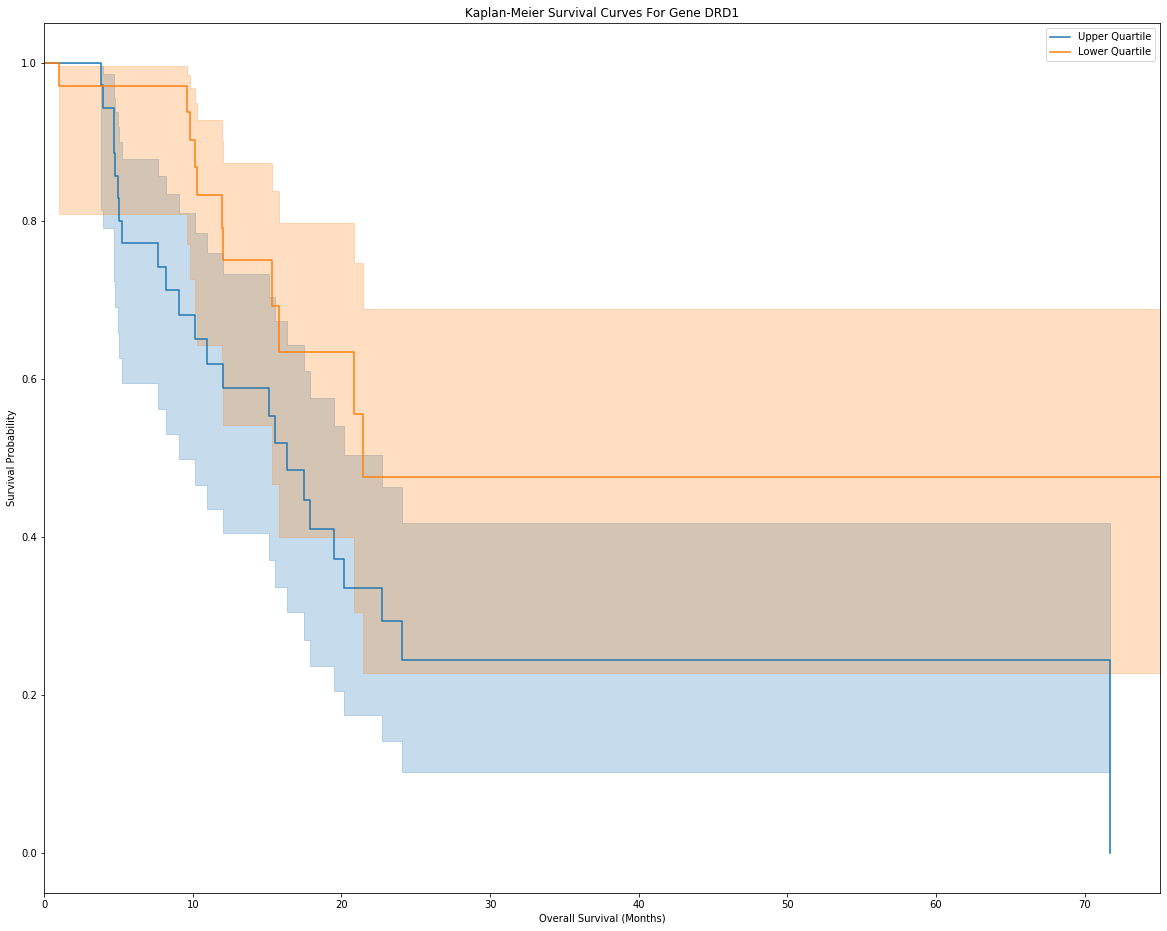

GRM7


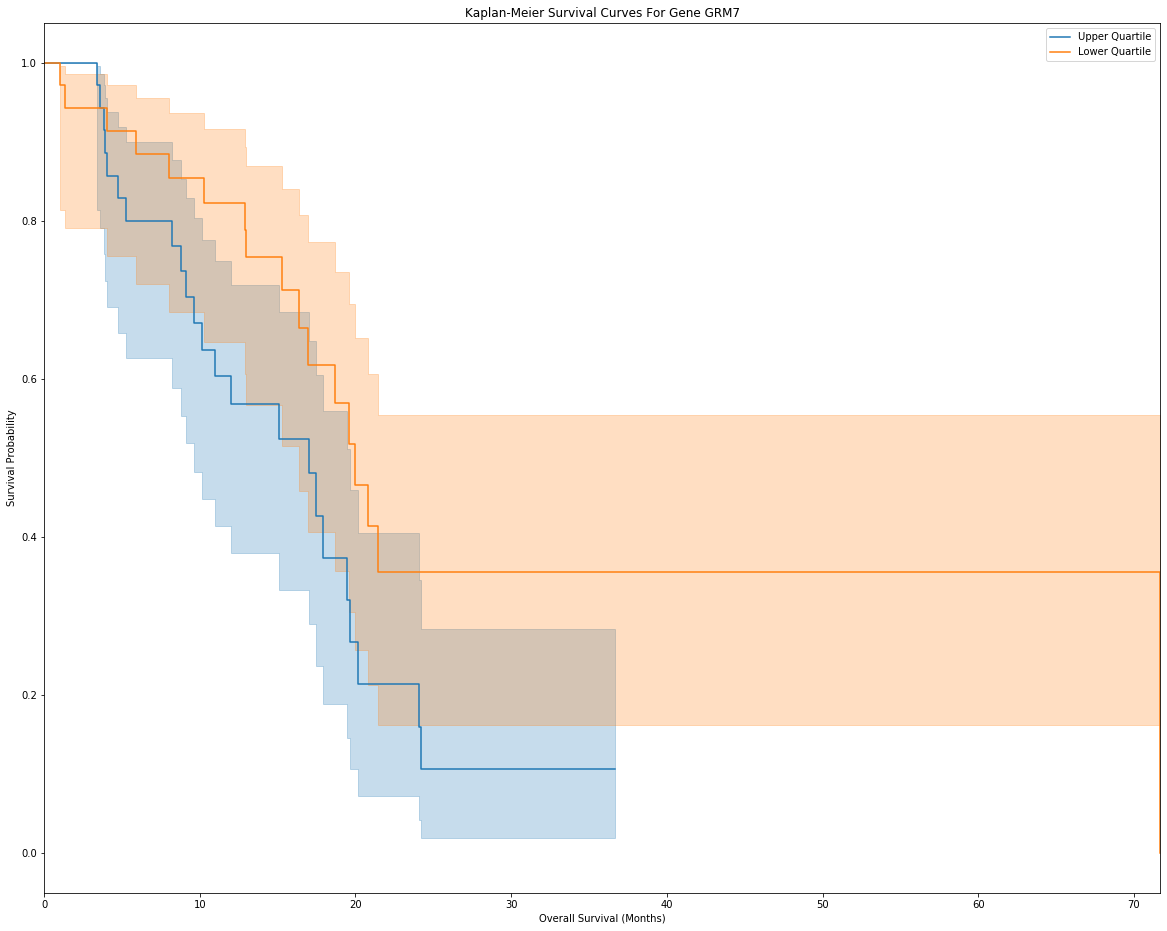

GABRA1


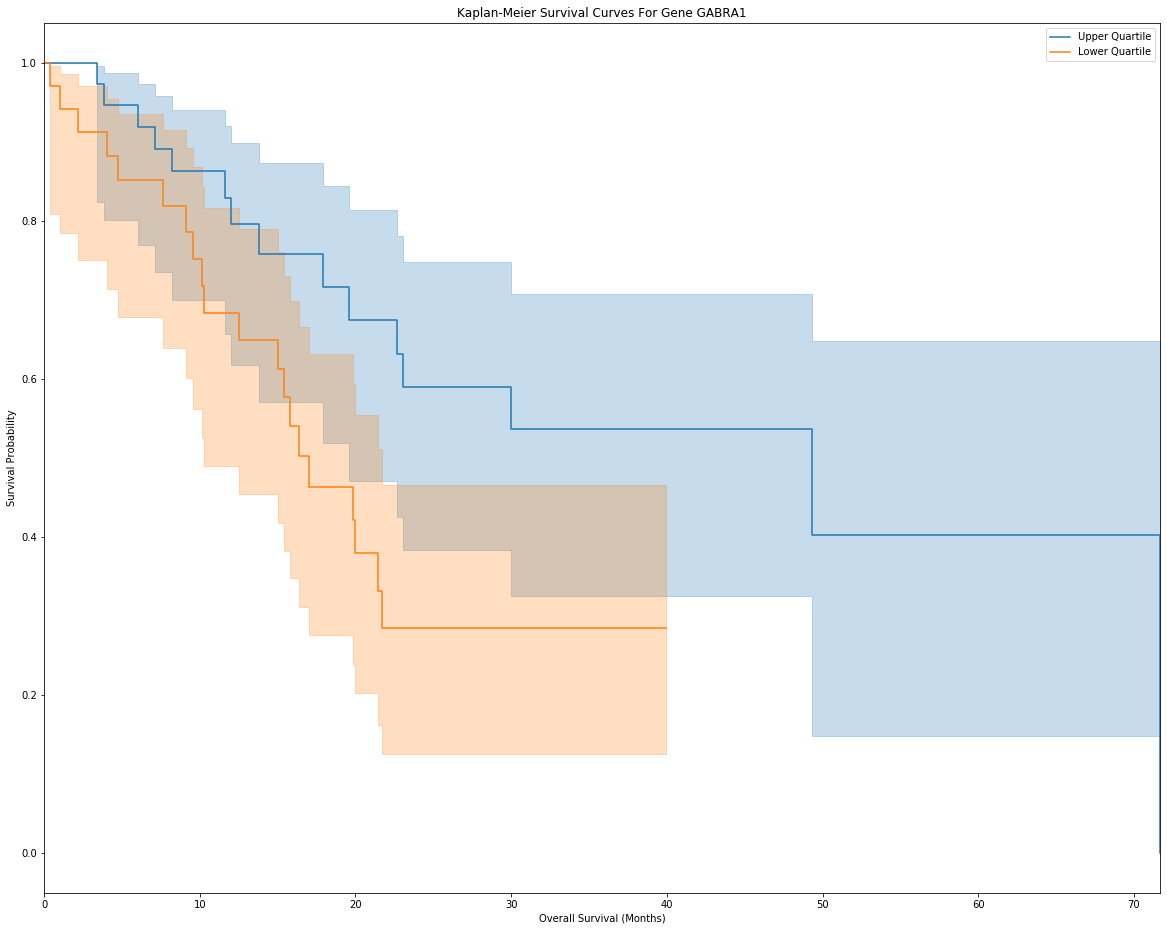

GABRA3


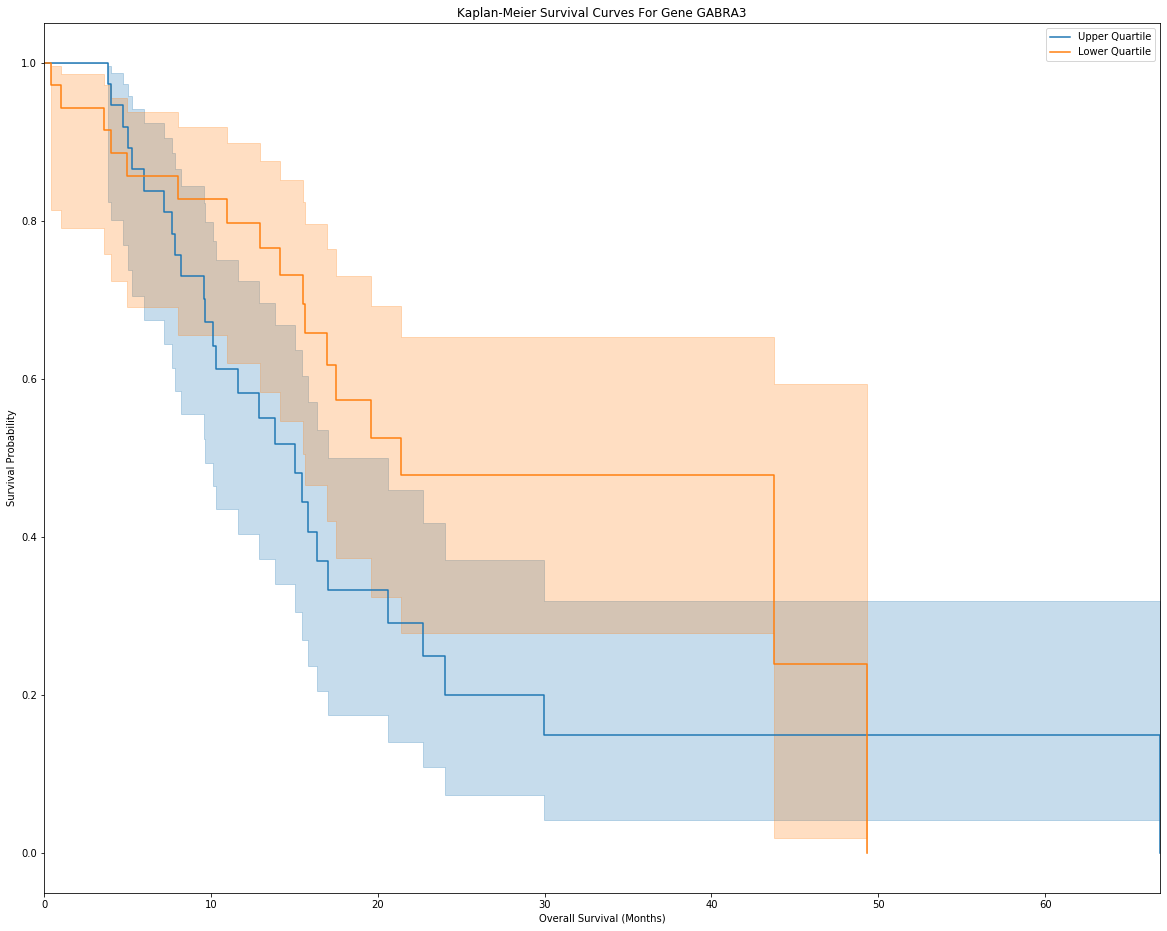

GABRA4


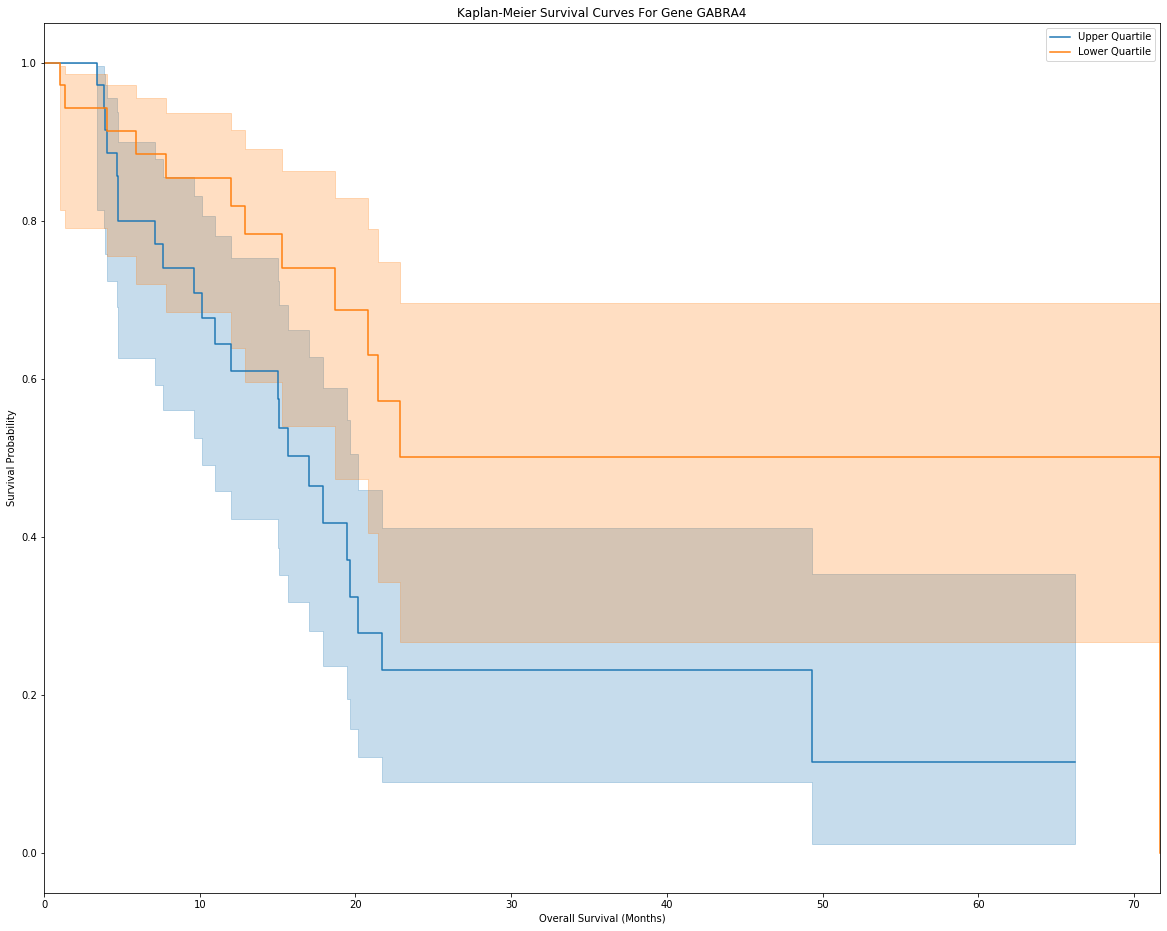

GABRA6


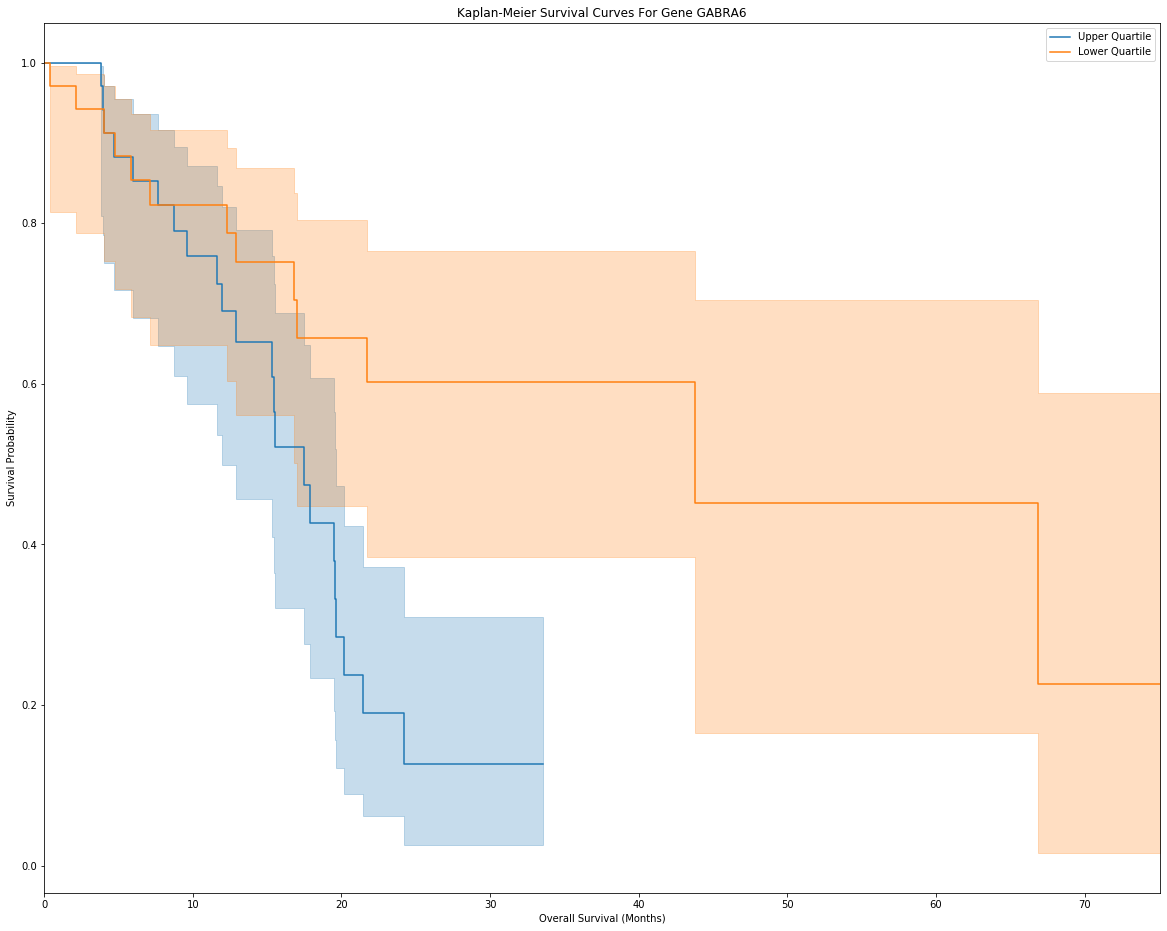

GABRB1


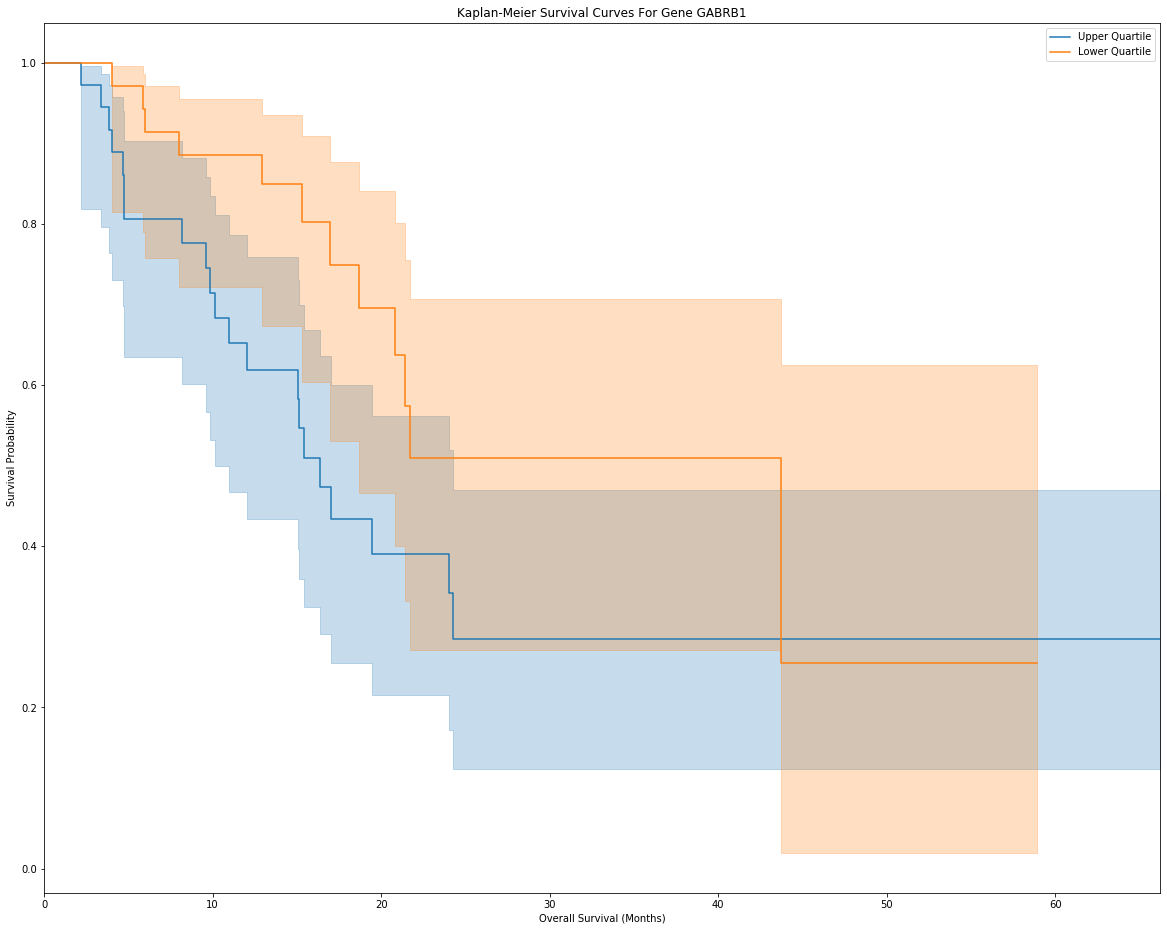

GABRG3


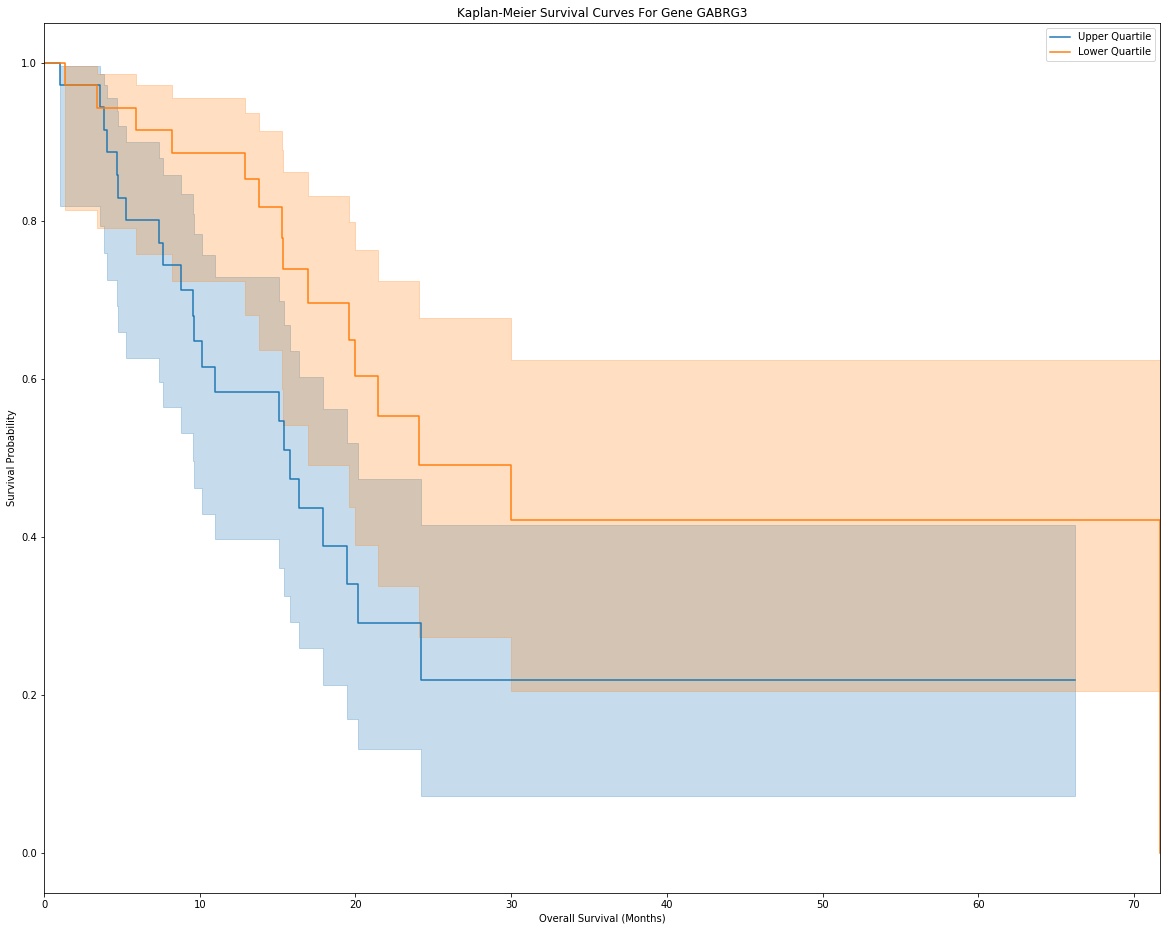

HTR5BP


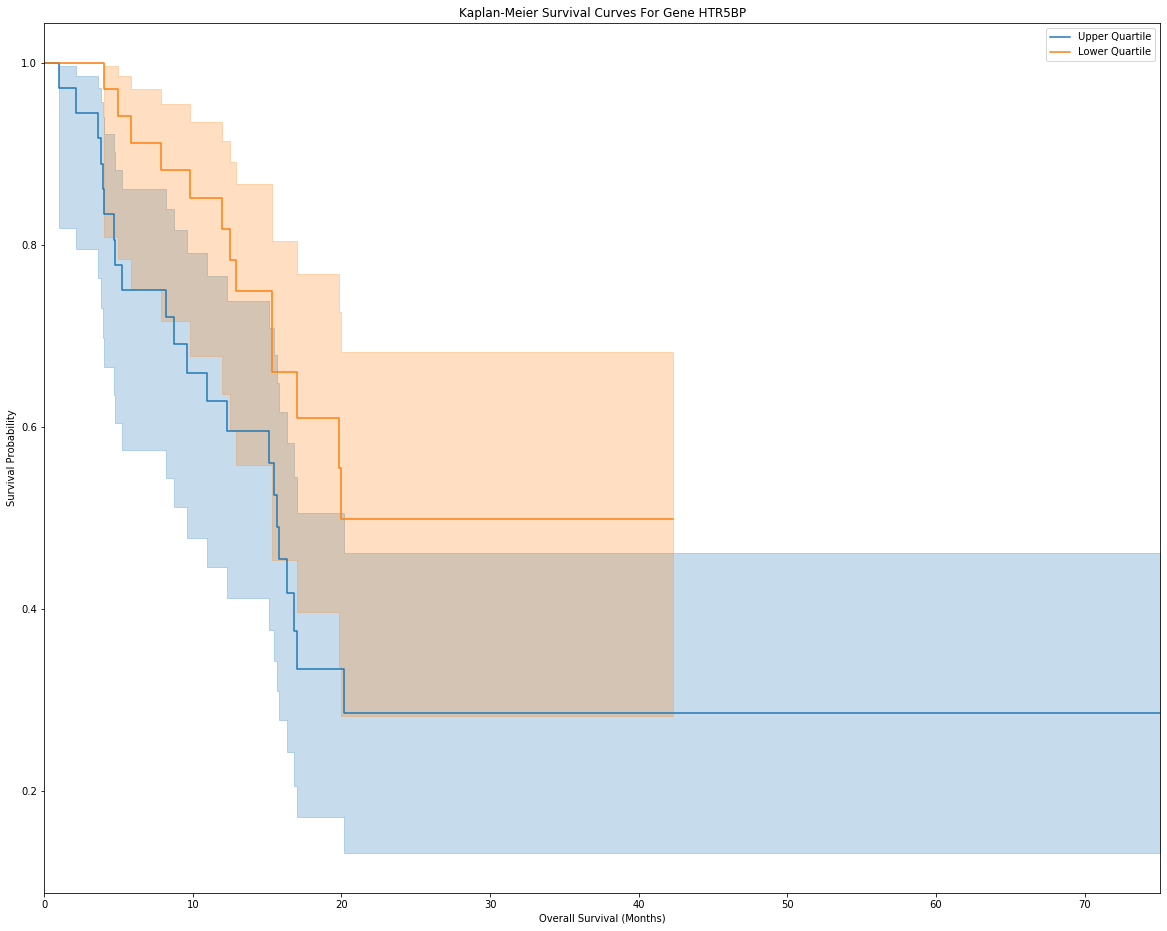

CHRNA2


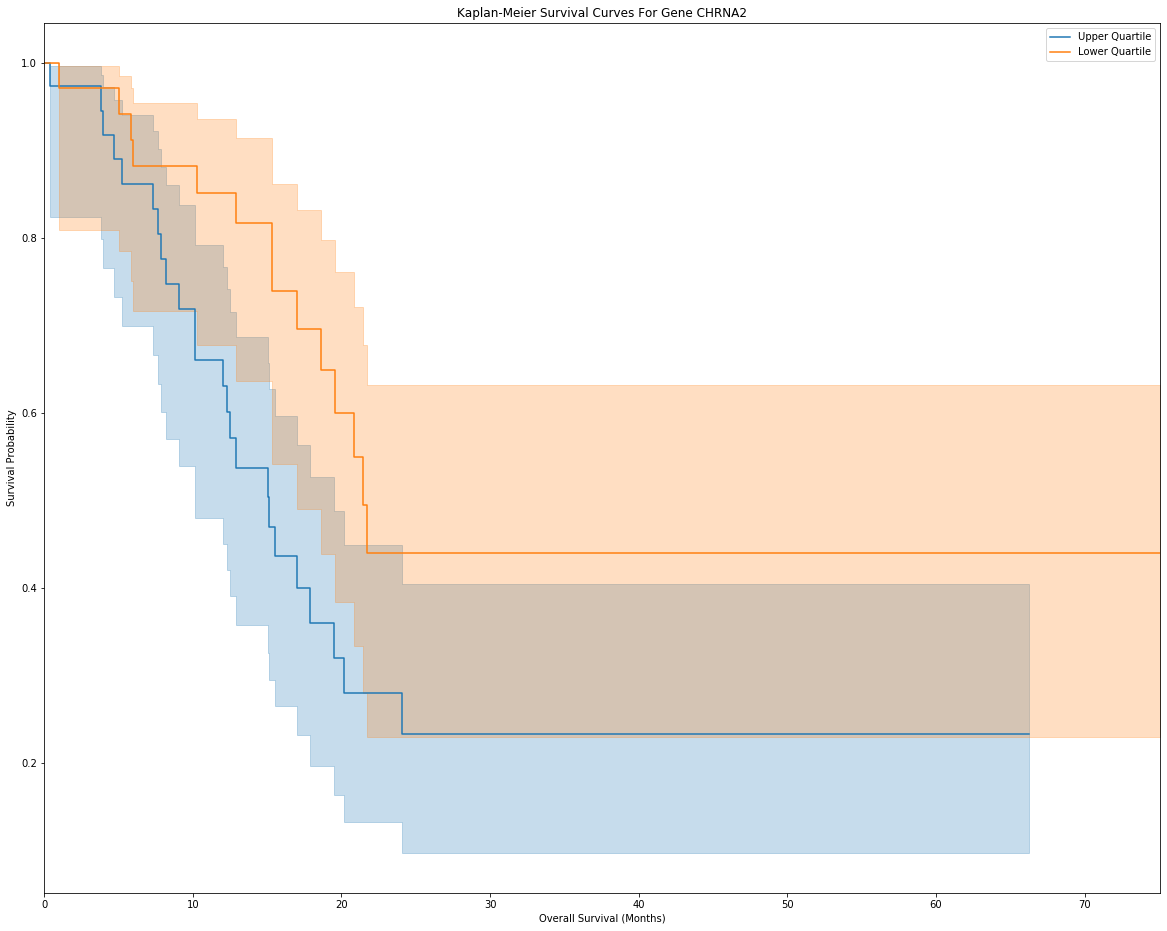

CHRNA5


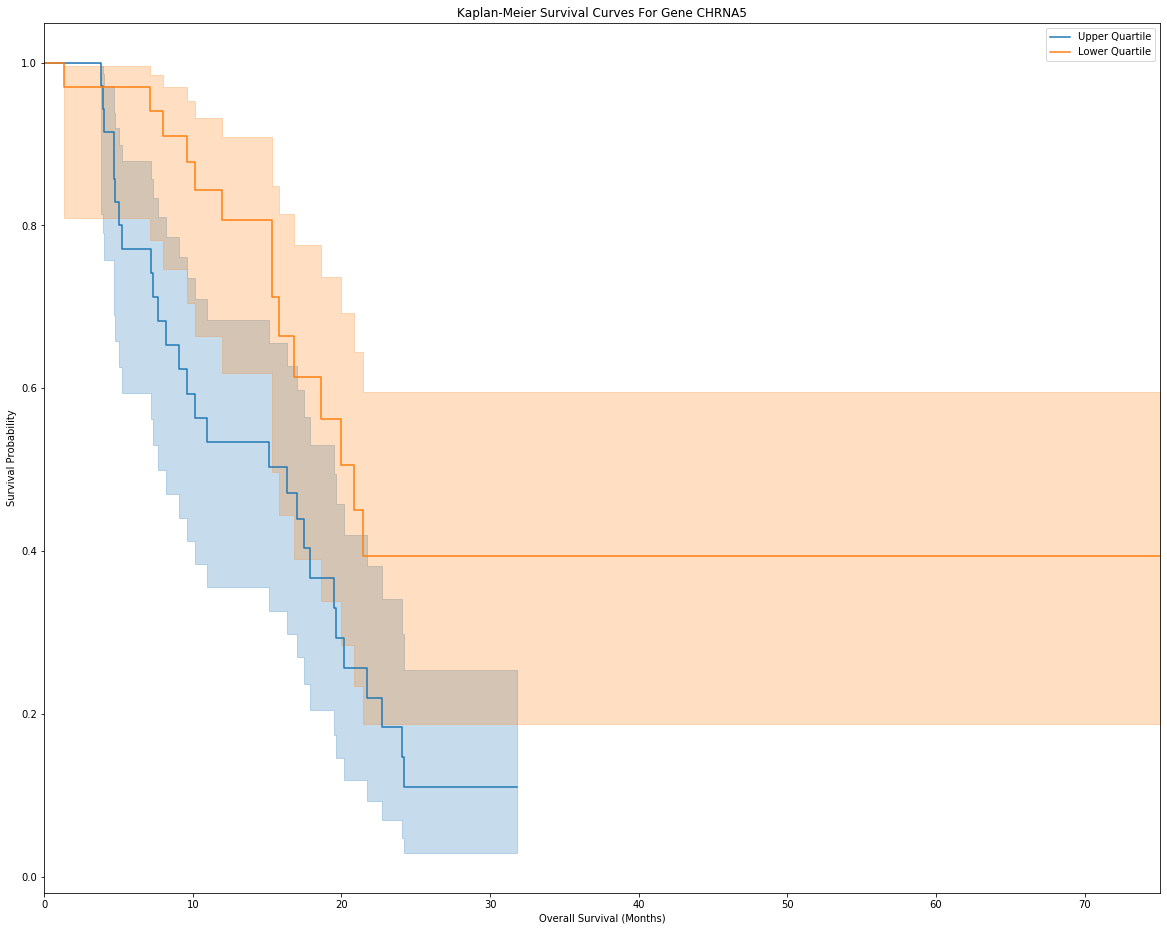

CHRNB2


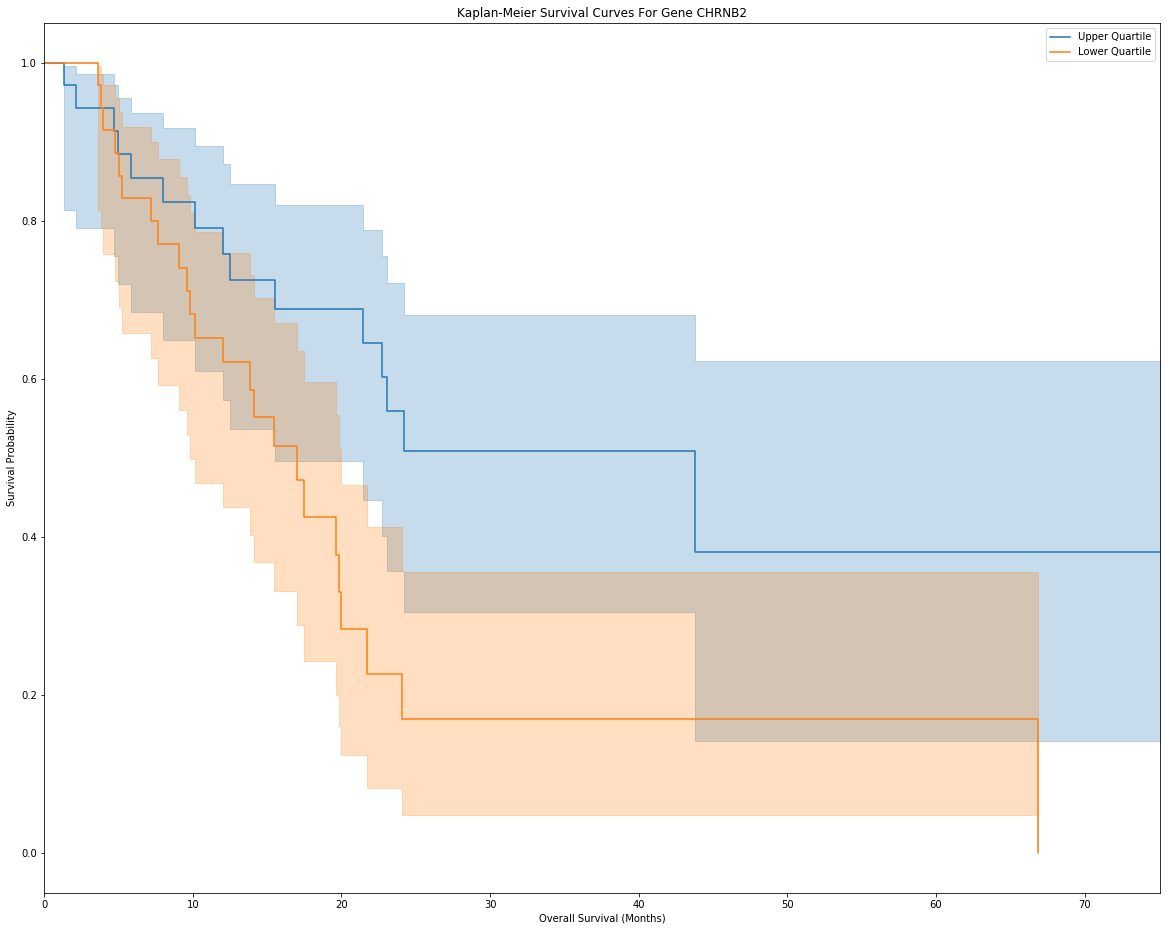

CHRNB3


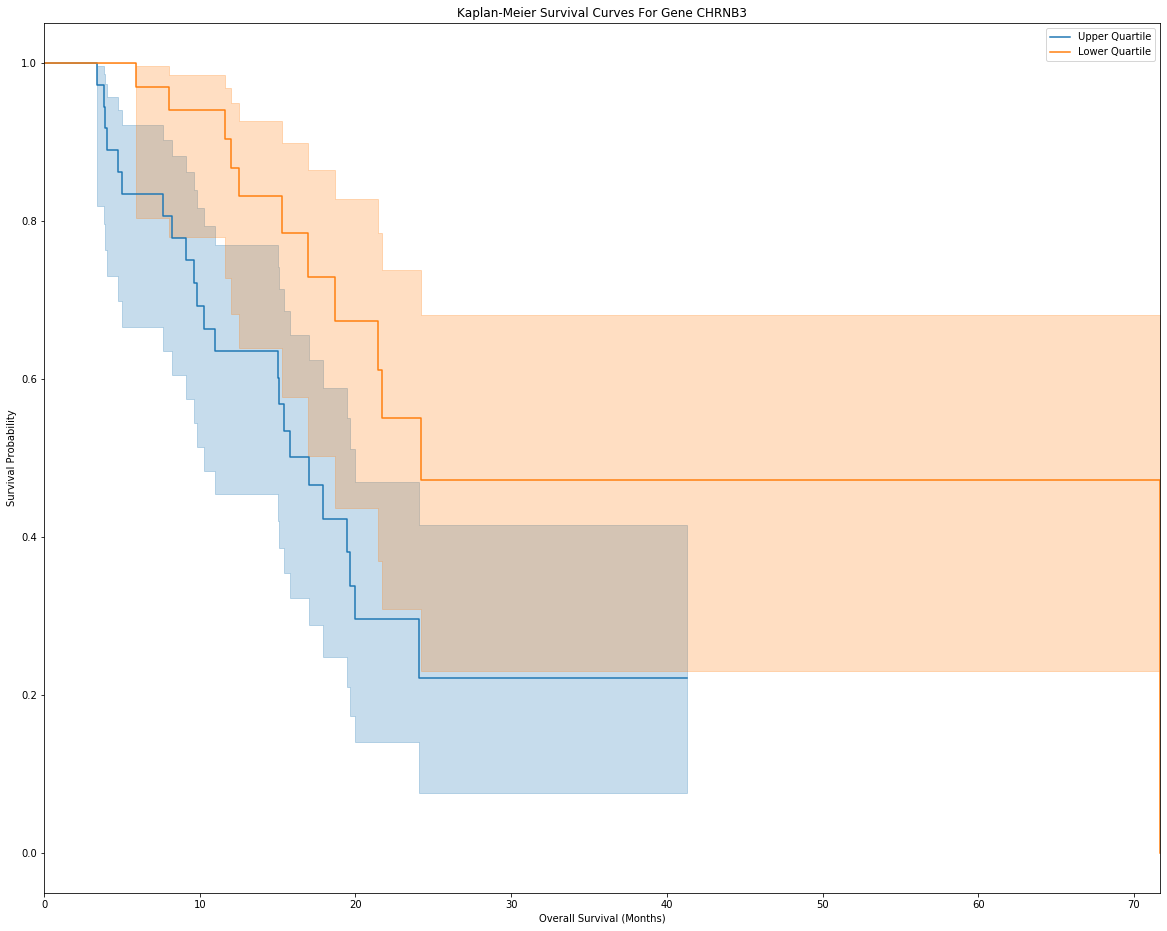

In [43]:
apply_all_neuro_genes_to_kmf()